# Module 5: Functions and File I/O
## Lecture 2: Interacting with the filesystem

CSCI 1360: Foundations for Informatics and Analytics

## Overview and Objectives

So far, all the data we've worked with have either been manually instantiated as lists, or randomly generated. Here we'll finally get to go over reading to and writing from the filesystem. By the end of this lecture, you should be able to:

 - Implement a basic file reader / writer using built-in Python tools
 - Use exception handlers to make your interactions with the filesystem robust to failure
 - Use Python tools to move around the filesystem

## Part 1: Interacting with text files

Text files are probably the most common and pervasive format of data. They can contain almost anything: weather data, stock market activity, literary works, and raw web data.

Text files are also convenient for your own work: once some kind of analysis has finished, it's nice to dump the results into a file you can inspect later.

### Reading an entire file

So let's jump into it! Let's start with something simple; say...the text version of Lewis Carroll's *Alice in Wonderland*?

In [1]:
file_object = open("alice.txt", "r")
contents = file_object.read()
print(contents[:71])
file_object.close()

Alice's Adventures in Wonderland

                ALICE'S ADVENTURES IN


Let's walk through the code, line by line. First, we have a call to a function `open()` that accepts two arguments:

In [4]:
file_object = open("alice.txt", "r")

 - The first argument is the *file path*. It's like a URL, except to a file on your computer. It should be noted that, unless you specify a leading forward slash `"/"`, Python will interpret this path to be *relative* to wherever the Python script is that you're running with this command.

 - The second argument is the *mode*. This tells Python whether you're reading from a file, writing to a file, or appending to a file. We'll come to each of these.

These two arguments are part of the function `open()`, which then returns a *file descriptor*. You can think of this kind of like a "pointer" or "reference" to the `file_object`, a "conduit" to interacting with the file from Python.

The next line is where the magic happens:

In [3]:
contents = file_object.read()

In this line, we're calling the method `read()` on the file reference we got in the previous step. This method goes into the file, pulls out *everything* in it, and sticks it all in the variable `contents`. One big string!

In [5]:
print(contents[:71])

Alice's Adventures in Wonderland

                ALICE'S ADVENTURES IN


...of which I then print the first 71 characters, which contains the name of the book and the author. Feel free to print the entire string `contents`; it'll take a few seconds, as you're printing the whole book!

(PS: notice that I'm slicing the string!)

Finally, the last and possibly most important line:

In [5]:
file_object.close()

This statement explicitly closes the file reference, effectively shutting the valve to the file. 

**DO NOT** underestimate the value of this statement!

There are weird errors that can pop up when you forget to close file descriptors. It can be difficult to remember to do this, though!

Fortunately, there's an alternative we can use!

In [6]:
with open("alice.txt", "r") as file_object:
    contents = file_object.read()
    print(contents[:71])

Alice's Adventures in Wonderland

                ALICE'S ADVENTURES IN


This code works identically to the code before it. The difference is, by using a `with` block, Python intrinsically closes the file descriptor at the end of the block. Therefore, no need to remember to do it yourself! Hooray!

Let's say, instead of *Alice in Wonderland*, we had some behemoth of a piece of literature: something along the lines of *War and Peace* or even an entire encyclopedia. Essentially, not something we want to read into Python *all at once* (which is what the `read()` function does).

Fortunately, we have an alternative:

In [7]:
with open("alice.txt", "r") as file_object:
    num_lines = 0
    for line_of_text in file_object:  # Use the file reference as a list!
        print(line_of_text.strip())  # Note the .strip() function!
        num_lines += 1
        if num_lines == 5: break  # After 5 lines, break this loop.

Alice's Adventures in Wonderland

ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll


We can use a `for` loop just as we're used to doing with lists. In this case, at each iteration, Python will hand you **exactly 1** line of text from the file to handle it however you'd like.

Of course, if you still want to read in the entire file at once, but really like the idea of splitting up the file line by line, there's a function for that, too:

In [8]:
with open("alice.txt", "r") as file_object:
    
    # The .readlines() function below will read the *entire*
    # file at once (like the read() function before), but will
    # return it as a *list* of *individual lines*, rather
    # than one long string (again, what read() does).
    
    lines_of_text = file_object.readlines()
    print(lines_of_text[0])

Alice's Adventures in Wonderland



By using `readlines()` instead of plain old `read()`, we'll get back a **list of strings**, where each element of the list is a single line in the text file. In the code snippet above, I've printed the first line of text from the file.

### Writing to a file

We've so far seen how to *read* text from a file. What if we've done some computations and want to save our results to a file?

In [1]:
data_to_save = "This is important data. Definitely worth saving."
with open("outfile.txt", "w") as file_object:
    file_object.write(data_to_save)

You'll notice two important changes from before:

 1. Switch the `"r"` argument in the `open()` function to `"w"`. You guessed it: we've gone from **R**eading to **W**riting.
 2. Call `write()` on your file descriptor, and pass in the data you want to write to the file (in this case, `data_to_save`).

If you try this using a new notebook on Jupyter (or on your local machine), you should see a new text file named "`outfile.txt`" appear in the same directory as your script. Give it a shot!

Here's a schematic of the code block you just saw, with the relevant portions highlighted.

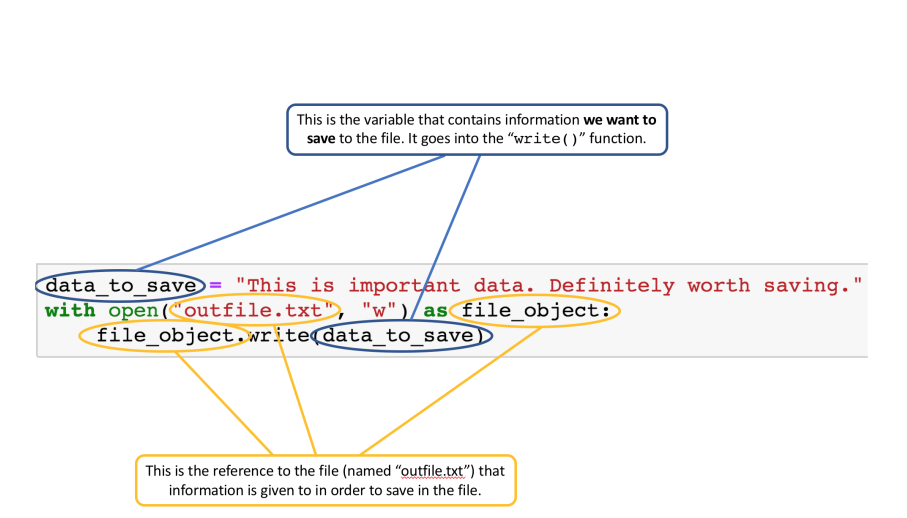

Some notes about writing to a file:

 - If the file you're writing to does NOT currently exist, Python will try to create it for you. In most cases this should be fine (but we'll get to outstanding cases later).

 - If the file you're writing to DOES already exist, Python will overwrite everything in the file with the new content. As in, **everything that was in the file before will be erased**.

That second point seems a bit harsh, doesn't it? Luckily, there is recourse.

### Appending to an existing file

If you find yourself in the situation of writing to a file multiple times, and wanting to keep what you wrote to the file previously, then you're in the market for *appending* to a file.

This works *exactly* the same as writing to a file, with one small wrinkle:

In [10]:
data_to_save = "This is ALSO important data. BOTH DATA ARE IMPORTANT."
with open("outfile.txt", "a") as file_object:
    file_object.write(data_to_save)

The only change that was made was switching the `"w"` in the `open()` method to `"a"` for, you guessed it, **A**ppend.

If you look in `outfile.txt`, you should see both lines of text we've written.

Some notes on appending to files:

 - If the file does NOT already exist, then using "a" in `open()` is functionally identical to using "w".

 - You only need to use append mode if you *closed* the file descriptor to that file previously. If you have an open file descriptor, you can call `write()` multiple times; each call will append the text to the previous text. It's only when you *close* a descriptor, but then want to open up another one to the *same file*, that you'd need to switch to append mode.

Let's put together what we've seen by writing to a file, appending more to it, and then reading what we wrote.

In [2]:
data_to_save = "This is important data. Definitely worth saving.\n"
with open("outfile.txt", "w") as file_object:
    file_object.write(data_to_save)

In [3]:
data_to_save = "This is ALSO important data. BOTH DATA ARE IMPORTANT."
with open("outfile.txt", "a") as file_object:
    file_object.write(data_to_save)

In [6]:
with open("outfile.txt", "r") as file_object:
    contents = file_object.readlines()
    print("LINE 1:" + contents[0].strip())
    print("LINE 2:" + contents[1].strip())

LINE 1:This is important data. Definitely worth saving.
LINE 2:This is ALSO important data. BOTH DATA ARE IMPORTANT.


## Part 2: Preventing errors

Aside from the lecture on Exceptions, the concept of error-handling hasn't been emphasized very heavily.

For the most part, data science is about building models and performing computations, so you can make inferences from your data.

However, nearly every survey of the industry that says the average data scientist spends the *vast* majority of their time cleaning and organizing their data.

![time spent](../docs/slides/Lecture10/Time-1200x511.jpg)

Data is messy and computers are fickle. Just because that file was there yesterday doesn't mean it'll still be there tomorrow. When you're reading from and writing to files, you'll need to put in checks to make sure things are behaving the way you expect, and if they're not, that you're handling things gracefully.

We're going to become good friends with `try` and `except` whenever we're dealing with files. For example, let's say I want to read again from that *Alice in Wonderland* file I had:

In [10]:
with open("alicee.txt", "r") as file_object:  # Notice the misspelling...
    contents = file_object.readlines()
    print(contents[0])

FileNotFoundError: [Errno 2] No such file or directory: 'alicee.txt'

Whoops! **Can you figure out what went wrong?**

In this example, I simply misnamed the file (look closely: it's trying to find `alicee.txt`, instead of the correct `alice.txt`). In practice, maybe the file was moved; maybe it was renamed; maybe the hard drive failed, or any number of other reasons. Whatever the reason, **your program should be able to handle missing files.**

You could code this up yourself:

In [1]:
filename = "alicee.txt"
try:
    with open(filename, "r") as file_object:
        contents = file_object.readlines()
        print(contents[0])
except:
    print("Sorry, the file '{}' does not seem to exist.".format(filename))

Sorry, the file 'alicee.txt' does not seem to exist.


Pay attention to this: **this will most likely show up on future assignments / exams, and you'll be expected to properly handle missing files or incorrect filenames**.

## Part 3: Moving around the filesystem

Turns out, you can automate a significant chunk of the double-clicking-around that you do on a Windows machine looking for files. Python has an `os` module that is very powerful.

There are a ton of utilities in this module--I encourage you to [check out everything it can do](https://docs.python.org/3.5/library/os.html)--but I'll highlight a few of my favorites here.

### `getcwd`

This is one of your mainstays: it tells you the full path to where your Python program is currently executing.

"cwd" is shorthand for "current working directory."

In [2]:
import os

print(os.getcwd())

/home/sak/Desktop/CSCI1360/Lectures/module5


That directory is where I'm building this lecture! :)

### `chdir`

You know where you are using `getcwd`, but let's say you actually want to be somewhere else.

`chdir` is the Python equivalent of typing `cd` on the command line, or quite literally double-clicking a folder. It is shorthand for "change directory".

In [13]:
print(os.getcwd())

/home/sak/Desktop/CSCI1360/Lectures/module5


In [3]:
# Go up one directory.
os.chdir("..")

In [4]:
# Print the current working directory again.
print(os.getcwd())

/home/sak/Desktop/CSCI1360/Lectures


Note the differences in the two runs of `os.getcwd()`!

### `listdir`

Now you've made it into your directory of choice, but you need to know what files exist. You can use `listdir` to, literally, list the directory contents.

In [17]:
for item in os.listdir("."):  # A dot "." means the current directory
    print(item)

books
Syllabus.pdf
Assignments
Lectures_org
QRCode for CSCI 1360 Attendance.png
solutions
Lectures
Assignments.zip
Lectures.zip
my_lectures
submissions
my_assignments


Those are the actual folder contents!

### Modifying the filesystem

There are a ton of functions at your disposal to actually make changes to the filesystem.

 - `os.mkdir` and `os.rmdir`: create and delete directories, respectively

 - `os.remove` and `os.unlink`: delete files (both are equivalent)

 - `os.rename`: renames a file or directory to something else (equivalent to "move", or "`mv`")

### `os.path`

The base `os` module has a lot of high-level, basic tools for interacting with the filesystem. If you find that your needs exceed what this module can provide, it has a submodule for more specific filesystem interactions.

For instance: testing if a file or directory even exists at all?

In [7]:
import os.path

if os.path.exists("/usr"):
    print("Path exists!")
else:
    print("No such directory.")

Path exists!


In [20]:
if os.path.exists("/this/does/not/exist"):
    print("Path exists!")
else:
    print("No such directory.")

No such directory.


Once you know a file or directory exists, you can get even more specific: is it a *file*, or a *directory*?

Use `os.path.isdir` and `os.path.isfile` to find out.

In [21]:
if os.path.exists("/Users/sak") and os.path.isdir("/Users/sak"):
    print("It exists, and it's a directory.")
else:
    print("Something was false.")

Something was false.


### `join`

This is a relatively unassuming function that is quite possibly the single most useful one; I certainly find myself using it all the time.

To illustrate: you're running an image hosting site. You store your images on a hard disk, perhaps at `C:\\images\\`. Within that directory, you stratify by user: each user has their own directory, which has the same name as their username on the site, and all the images that user uploads are stored in their folder.

For example, if I was a user and my username was `user123`, my uploaded images would be stored at `C:\\images\\user123\\`. A different user, `carter2`, would have their images stored at `C:\\images\\carter2\\`. And so on.

Let's say I've uploaded a new image, `my_cat.png`. I need to stitch a full path together to *move* the image to that path.

One way to do it would be hard-coded (hard-core?):

In [22]:
# Hard-code our variables.

img_name = "my_cat.png"
username = "user123"
base_path = "C:\\images"

In [23]:
# Now, stitch them together into a full path.

full_path = base_path + "\\" + username + "\\" + img_name
print(full_path)

C:\images\user123\my_cat.png


That...works. I mean, it works, but it ain't pretty. Also, this will fail **miserably** if you take this code verbatim and run it on another computer!

Enter `join`. This not only takes the hard-coded-ness out of the process, but is also **operating-system aware**: that is, it will auto-magically do the correct thing whether you're running Windows, Mac, or Linux, without any input on your part.

In [24]:
# Same as before: define our variables.

img_name = "my_cat.png"
username = "user123"
base_path = "C:\\images"

In [25]:
# Instead of using the + operator to stitch them
# together, just give them to os.path.join().

full_path = os.path.join(base_path, username, img_name)
print(full_path)

C:\images/user123/my_cat.png


(of course, the slashes are flipped the "wrong" way, because *I'm on a Unix system*, and Python detects that and inserts the correct-facing slashes--but you see how it works in practice!)

## Review Questions

Some questions to discuss and consider:

1: In Part 1 of the lecture when we read in and printed the first few lines of *Alice in Wonderland*, you'll notice each `print` statement used a string that had used `strip()`. Explain why `strip()` was needed; or, put another way, explain what would happen if you took *out* `strip()` and left everything else the same.

2: Describe the circumstances under which append "a" mode and write "w" mode are identical.

3: I'm in a folder, `"/some/folder/"`. I want to create a list of all the `.png` images in the folder. Write a function that will do this.

4: For whatever reason, I've decided I don't like `os.path.exists` and don't want to use it (we'll call this the "YOLO Approach"). How would I write code to read files that may or may not exist, in folders that may or may not exist, without causing catastrophic program crashes?

In [1]:
import os
def list_of_images(dir_path):
    png_items_list = []
    for i in os.listdir(dir_path):
        if i.endswith('.png'):
            png_items_list.append(i)
    return png_items_list

print( list_of_images('.') )

['2.png', '1.png']


## Additional Resources

 1. Matthes, Eric. *Python Crash Course*, Chapter 10. 2016. ISBN-13: 978-1593276034
 2. McKinney, Wes. *Python for Data Analysis*, Chapter 6. 2013. ISBN-13: 978-1449319793
